In [13]:
import numpy as np
import math as m
from sympy import *
#from sympy.abc import x
import pylab as py
from JSAnimation import IPython_display
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [14]:
print 'Enter number of segments'
n = int(raw_input()) #кол-во отрезков
print 'Enter ends of segment'
a , b = raw_input().split() #отрезок
a = float(a)
b = float(b)

Enter number of segments
100
Enter ends of segment
-1 1


In [15]:
print 'Enter speed'
c = int(raw_input()) #скорость переноса
h = (b - a) / n
# tau = h / c *(X), такое что c*tau/h < 1

Enter speed
1


In [16]:
# print 'Enter X for tau'
X = float(raw_input())
tau = h * X / m.fabs(c)
if m.fabs(c) * tau / h > 1:
    print 'wrong input'
print 'kurant = ', m.fabs(c) * tau / h, ', tau = ', tau, ', h = ', h

0.4
kurant =  0.4 , tau =  0.008 , h =  0.02


In [17]:
def f(x):
    if (a + 0.4*(b-a) <= x <= a + 0.6*(b-a)):
        return 1
    else:
        return 0

num of steps = 126 
T = 1.008



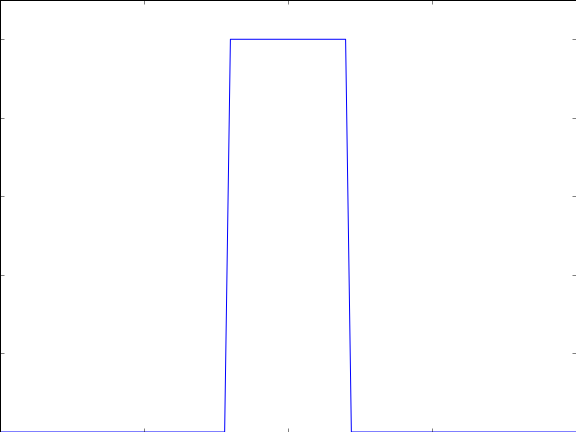
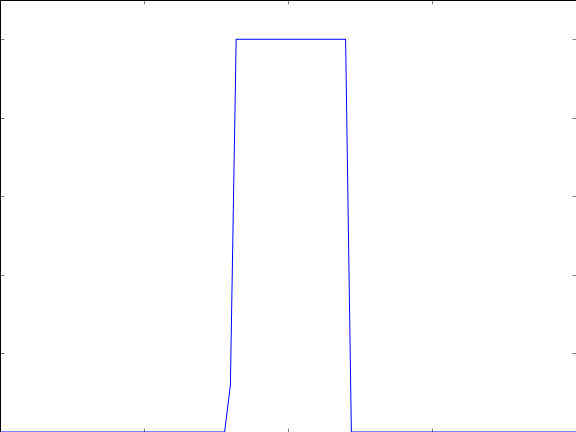
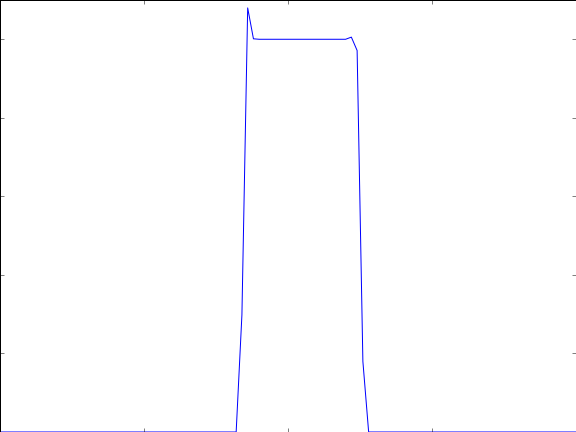
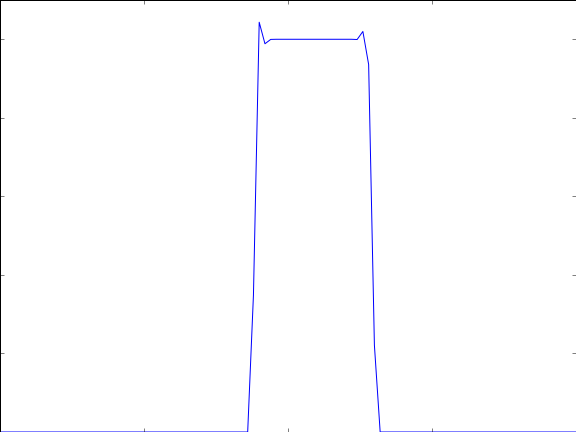
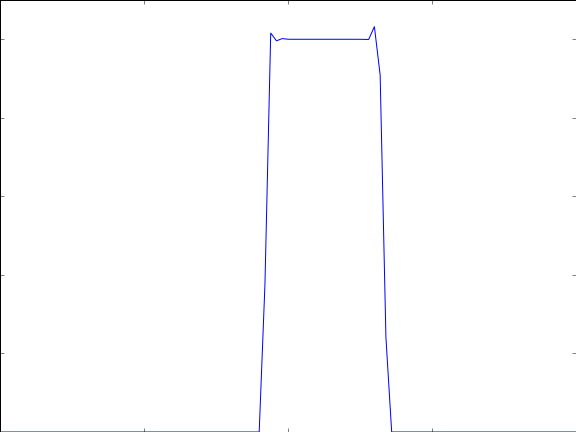
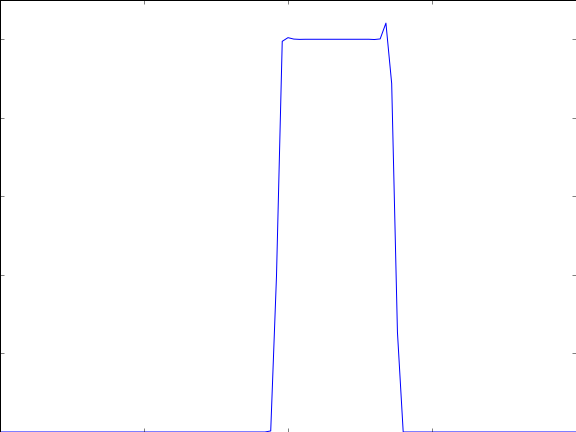
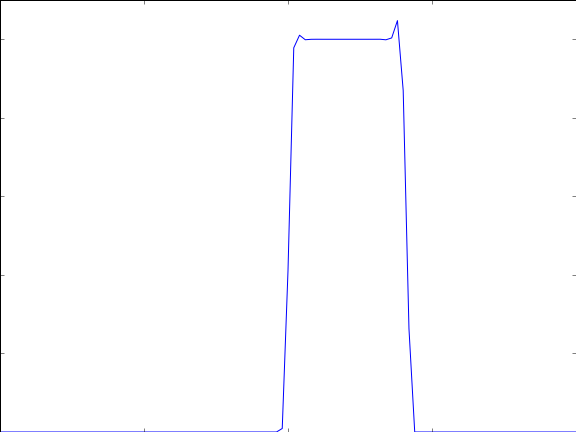
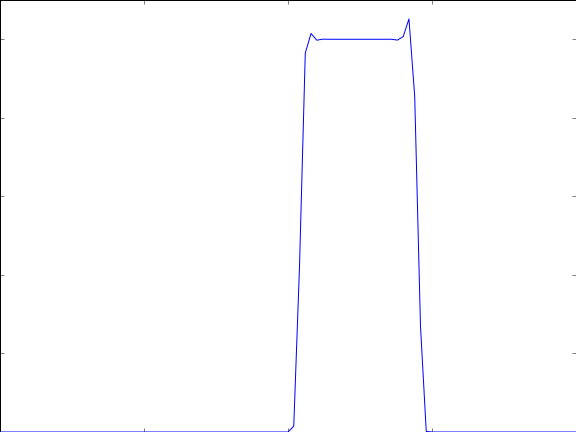
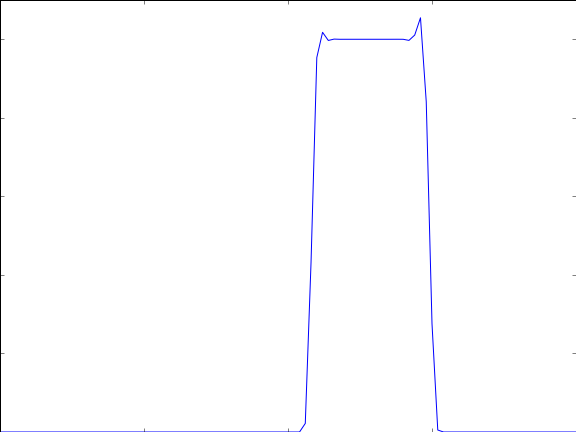
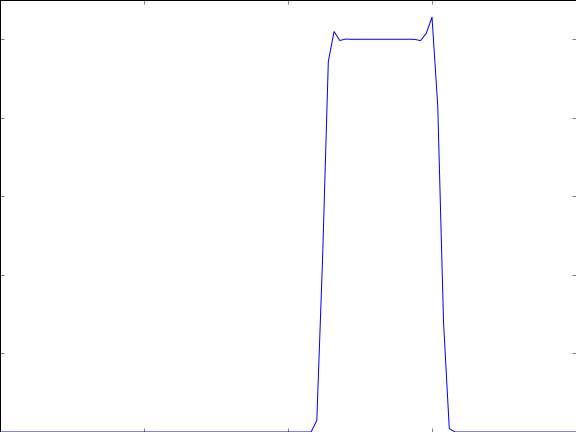
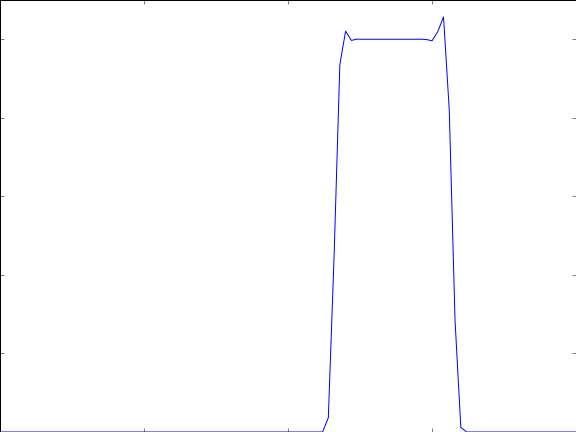
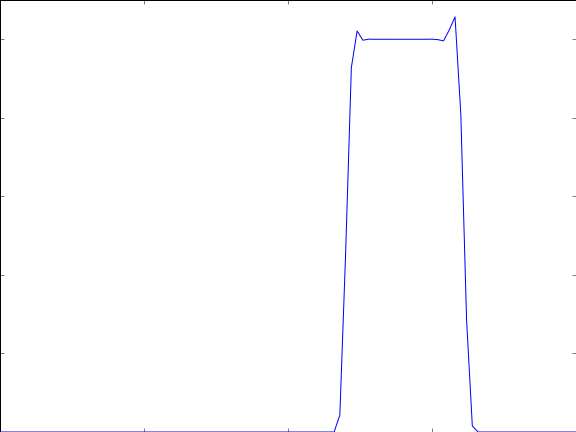
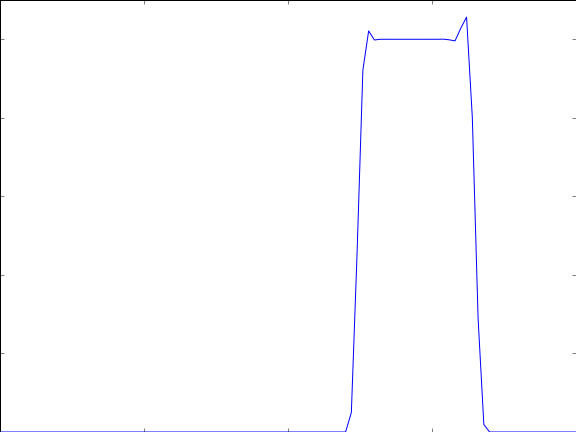
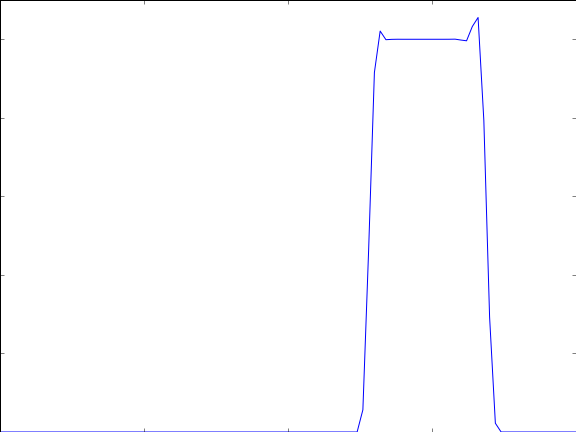
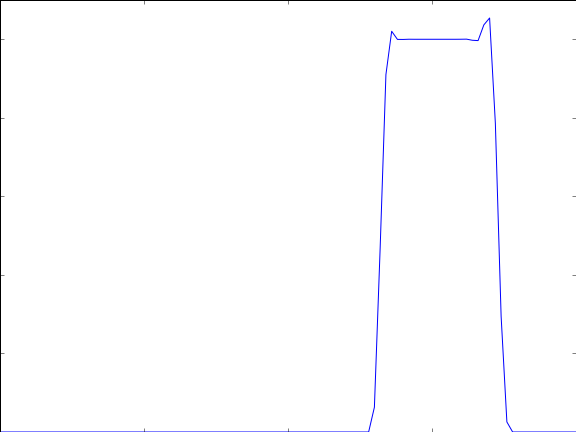
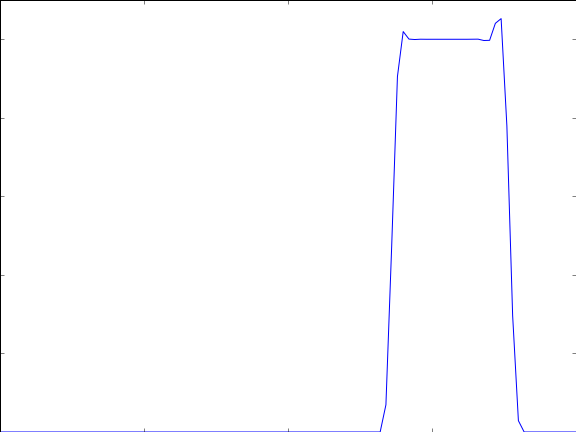
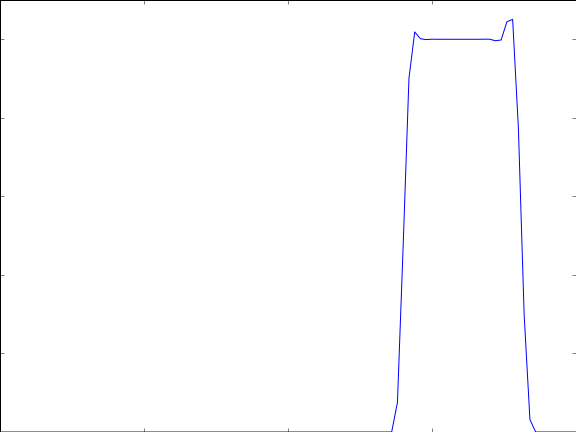
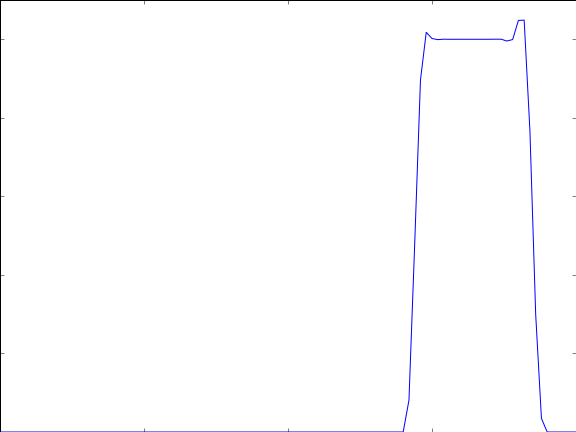
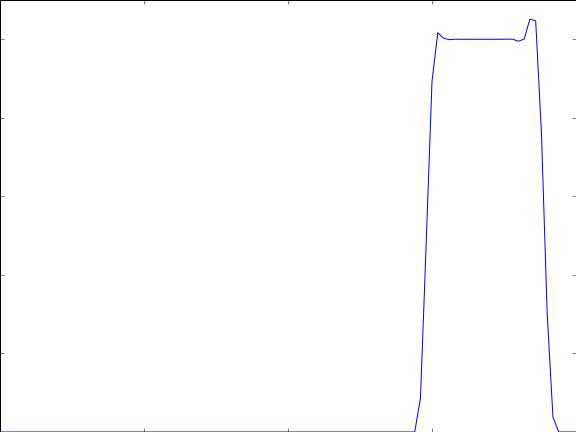
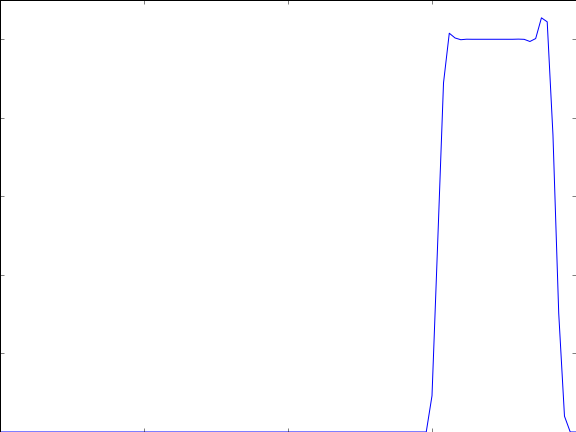
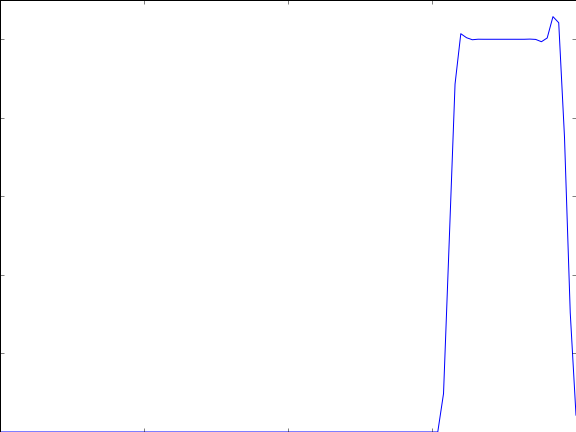
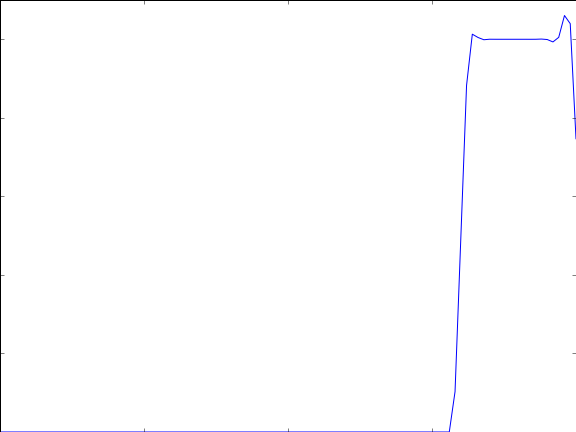
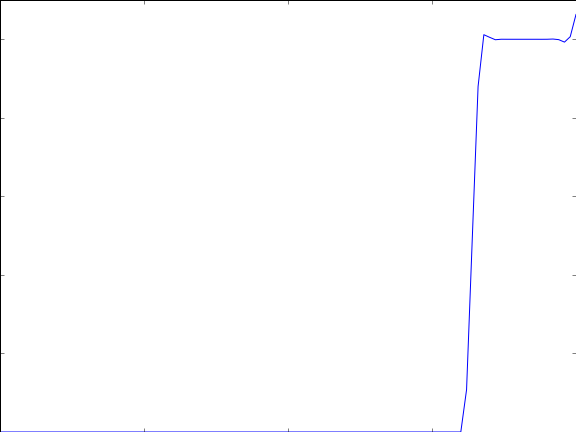
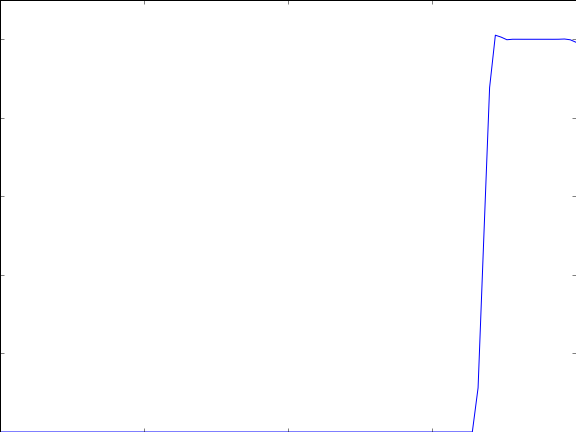
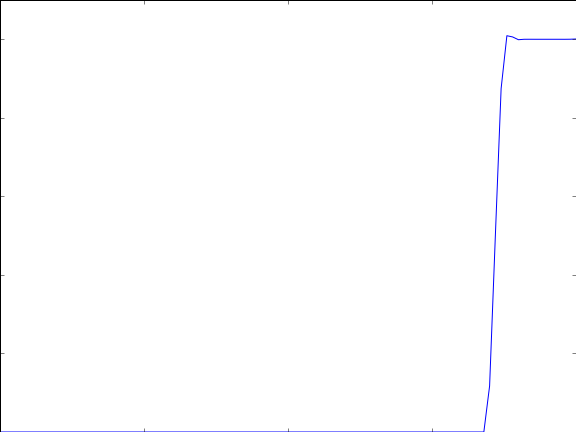
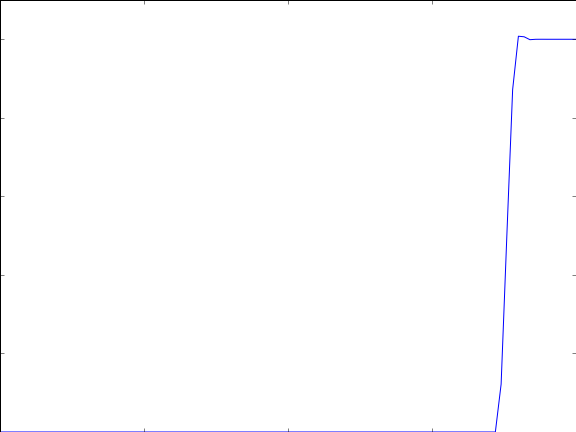
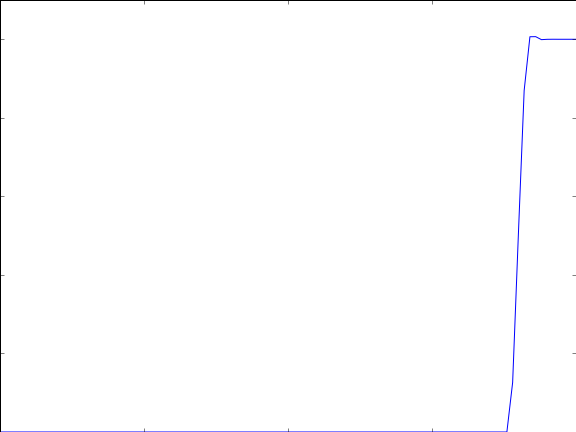

In [18]:
x = np.linspace(a, b, n+1) #сетка
result = []
u = np.zeros(n+1) # решение
v = np.zeros(n)
for i in range(n+1):
    u[i] = f(x[i])
for i in range(n):
    v[i] = f(x[i] + h / 2)
t = 0
num = 0
numT = int(1.0 / tau + 1)
result.append(list(u))
if c > 0:
    for j in range(numT):
        tmp = np.zeros(n+1)
        tmp1 = np.zeros(n)
        for i in range(1, n+1):
            A = np.array([[x[i-1]**2, x[i-1], 1], [(x[i-1]+h/2)**2, x[i-1] + h/2, 1], [x[i]**2, x[i], 1]])
            B = np.array([u[i-1], v[i-1], u[i]])
            coeff = LA.solve(A, B)
            tmp[i] = coeff[0] * (x[i] - c * tau) ** 2 + coeff[1] * (x[i] - c * tau) + coeff[2]
            tmp1[i-1] = coeff[0] * ((x[i-1] + h/2) - c * tau) ** 2 + coeff[1] * ((x[i-1] + h/2) - c * tau) + coeff[2]
            if tmp[i] < 10e-10:
                tmp[i] = 0
        u = tmp[:]
        v = tmp1[:]
        if num % 5 == 0:
            result.append(list(u))
        t += tau
        num += 1
else:
    for j in range(numT):
        tmp = np.zeros(n+1)
        tmp1 = np.zeros(n)
        for i in range(0, n):
            A = np.array([[x[i]**2, x[i], 1], [(x[i]+h/2)**2, x[i] + h/2, 1], [x[i+1]**2, x[i+1], 1]])
            B = np.array([u[i], v[i], u[i+1]])
            coeff = LA.solve(A,B)
            tmp[i] = coeff[0] * (x[i] - c * tau) ** 2 + coeff[1] * (x[i] - c * tau) + coeff[2]
            tmp1[i] = coeff[0] * ((x[i] + h/2) - c * tau) ** 2 + coeff[1] * ((x[i] + h/2) - c * tau) + coeff[2]
            if tmp[i] < 10e-10:
                tmp[i] = 0
        u = tmp[:]
        v = tmp1[:]
        if num % 5 == 0:
            result.append(list(u))
        t += tau
        num += 1
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])

def animate(i):
    axis.clear()
    axis.plot(x, result[i])
    axis.axis([a, b, 0, 1.1])
#     return dg.plot(axis, nontvd[i])

def init():
    axis.plot(x, result[0])
    axis.axis([a, b, 0
               , 1.1])
#     return dg.plot(axis, nontvd[0])

print 'num of steps =', num, '\nT =', t

animation.FuncAnimation(fig, animate, frames=len(result), 
                        init_func=init,interval=300, blit=False)